# HIT PREDICTOR

Itzae Flores - Diego Valdés - Tomás Dempster

### Importación librerias y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [131]:
music_genre = pd.read_csv('music_genre.csv')
music_genre.head()

music_prueba = music_genre.copy()

### Limpieza de datos

In [3]:
music_genre.describe().round(2)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,55888.40,44.22,0.31,0.56,221252.60,0.60,0.18,0.19,-9.13,0.09,0.46
std,20725.26,15.54,0.34,0.18,128671.96,0.26,0.33,0.16,6.16,0.10,0.25
min,20002.00,0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-47.05,0.02,0.00
25%,37973.50,34.00,0.02,0.44,174800.00,0.43,0.00,0.10,-10.86,0.04,0.26
50%,55913.50,45.00,0.14,0.57,219281.00,0.64,0.00,0.13,-7.28,0.05,0.45
75%,73863.25,56.00,0.55,0.69,268612.25,0.82,0.16,0.24,-5.17,0.10,0.65
max,91759.00,99.00,1.00,0.99,4830606.00,1.00,1.00,1.00,3.74,0.94,0.99


Eliminar columnas que no se utilizarán y datos nulos o faltantes en el dataset. Cambiar columna 'popularity' a booleano.

In [132]:
# print cantidad de datos 
print("cantidad de datos antes de limpieza: ", music_genre.shape)

# Eliminar columnas que no se utilizarán
column_not_use = ['key', 'mode', 'obtained_date']
print("columnas que no se utilizaran y se eliminan: ", column_not_use)
music_genre.drop(column_not_use, axis = 1, inplace = True)

# Eliminar datos nulos 
music_genre.dropna(inplace = True)

# Eliminar filas duplicadas
music_genre.drop_duplicates(inplace = True)

# Eliminar filas donde tempo == '?', duration < 0
print("Se eliminan filas donde tempo == '?' y duration menos a 0")
music_genre.drop(music_genre[music_genre['tempo'] == '?'].index, inplace = True)
music_genre.drop(music_genre[music_genre['duration_ms'] < 0].index, inplace = True)

# print cantidad de datos
print("cantidad de datos despues de limpieza: ", music_genre.shape)

# Revisar si cambiamos la condicion de exito
print("La condicion de exito de una cancion es que tenga una popularidad mayor al promedio")

hit_comdition = music_genre['popularity'].mean()

print(music_genre['popularity'].mean())
#duplicar popularity para no perder la original
music_genre['popularity_value'] = music_genre['popularity'].copy()
music_genre['popularity'] = (music_genre['popularity'] >  hit_comdition).astype(bool)
music_genre.rename(columns = {'popularity': 'hit'}, inplace = True)
print(music_genre['hit'].value_counts())


cantidad de datos antes de limpieza:  (50005, 18)
columnas que no se utilizaran y se eliminan:  ['key', 'mode', 'obtained_date']
Se eliminan filas donde tempo == '?' y duration menos a 0
cantidad de datos despues de limpieza:  (40560, 15)
La condicion de exito de una cancion es que tenga una popularidad mayor al promedio
44.27667652859961
True     20664
False    19896
Name: hit, dtype: int64


In [133]:
music_genre.head()

,instance_id,artist_name,track_name,hit,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre,popularity_value
1,46652.0,Thievery Corporation,The Shining Path,False,0.01270,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic,31.0
2,30097.0,Dillon Francis,Hurricane,False,0.00306,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,0.333,Electronic,28.0
3,62177.0,Dubloadz,Nitro,False,0.02540,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,0.270,Electronic,34.0
4,24907.0,What So Not,Divide & Conquer,False,0.00465,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,0.323,Electronic,32.0
6,43760.0,Jordan Comolli,Clash,True,0.02890,0.572,214408.0,0.803,0.000008,0.106,-4.294,0.3510,149.995,0.230,Electronic,46.0


Graficos de distribución de canciones por genero musical y popularidad de canciones

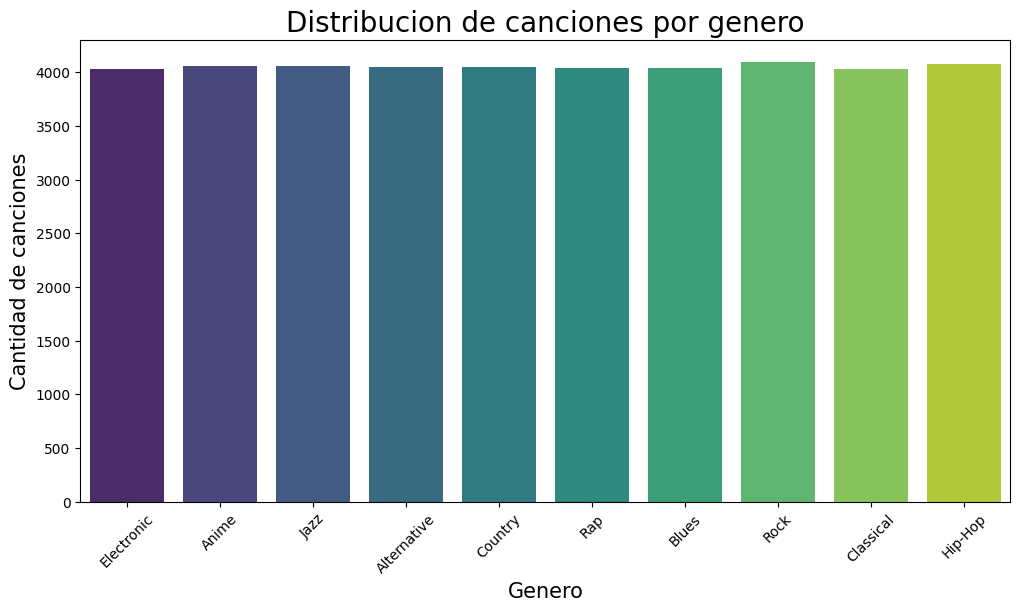

In [134]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'music_genre', data = music_genre, palette = 'viridis')
plt.title('Distribucion de canciones por genero', fontsize = 20)
plt.xlabel('Genero', fontsize = 15)
plt.ylabel('Cantidad de canciones', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

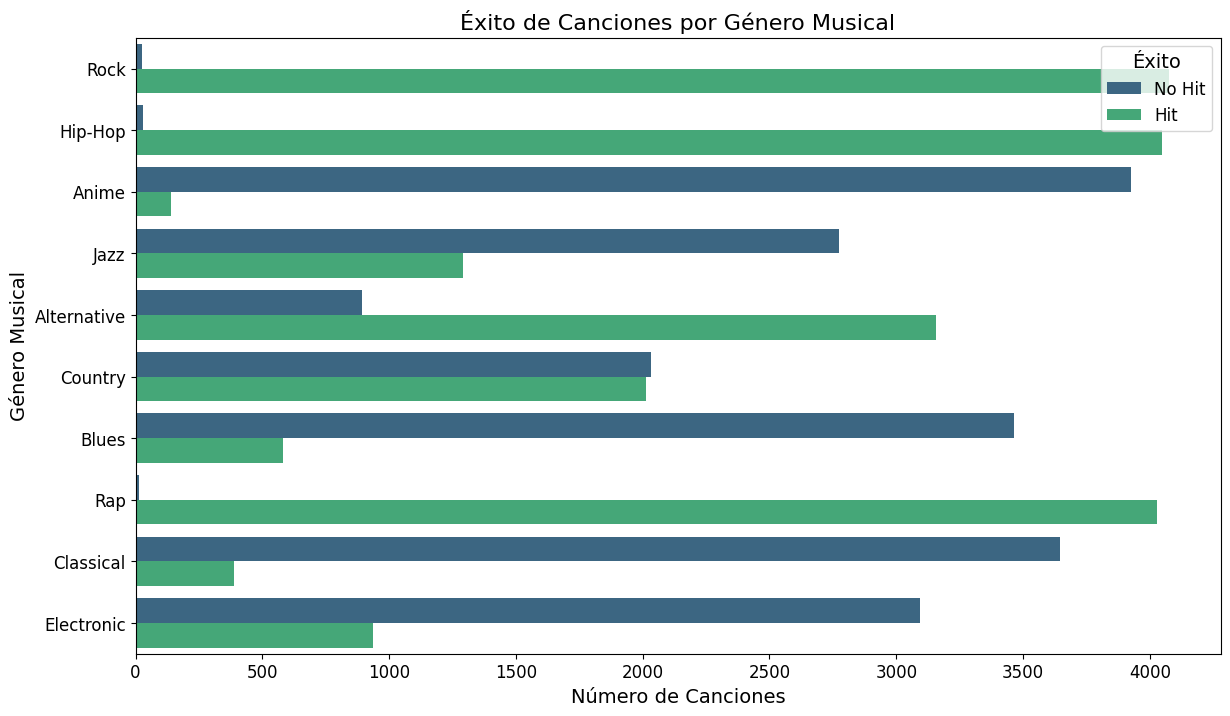

In [135]:
plt.figure(figsize=(14, 8))
sns.countplot(y='music_genre', data=music_genre, hue='hit', order=music_genre['music_genre'].value_counts().index, palette="viridis")
plt.title('Éxito de Canciones por Género Musical', fontsize=16)
plt.xlabel('Número de Canciones', fontsize=14)
plt.ylabel('Género Musical', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Éxito', loc='upper right', labels=['No Hit', 'Hit'], fontsize=12, title_fontsize=14)
plt.show()

Realizar one hot encoding y normalización de columnas numericas con MinMaxScaler.

In [138]:
# Convertir las columnas a numericas
#import label encoder
from sklearn.preprocessing import LabelEncoder


numerical_columns = ['acousticness', 'danceability', 'popularity_value', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
for column in numerical_columns:
    music_genre[column] = pd.to_numeric(music_genre[column], errors='coerce')


# Normalizar las columnas numericas
scaler = MinMaxScaler()
music_genre[numerical_columns] = scaler.fit_transform(music_genre[numerical_columns])

# Convertir las columnas categoricas a strings
categorical_columns = ['music_genre'] # Tambien esta 'artist_name', 'track_name', 'category' pero sgn yo no se deberian de considerar para one hot encoding
for column in categorical_columns:
    music_genre[column] = music_genre[column].astype(str)
    
# one hot encoding para las columnas categoricas
LabelEncoder = LabelEncoder()
for column in categorical_columns:
    music_genre[column] = LabelEncoder.fit_transform(music_genre[column])










### Analisis de datos

In [109]:
music_genre.describe().round(2)


,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
count,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00
mean,55874.83,0.31,0.54,0.05,0.60,0.18,0.19,0.75,0.08,0.46,0.46,4.51
std,20731.02,0.34,0.19,0.02,0.26,0.33,0.16,0.12,0.11,0.16,0.25,2.88
min,20002.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37994.75,0.02,0.41,0.04,0.43,0.00,0.09,0.71,0.02,0.33,0.26,2.00
50%,55899.50,0.14,0.55,0.05,0.64,0.00,0.12,0.78,0.03,0.46,0.45,5.00
75%,73817.50,0.55,0.68,0.06,0.82,0.15,0.24,0.82,0.08,0.57,0.65,7.00
max,91759.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00


In [110]:
music_genre

,instance_id,artist_name,track_name,hit,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
1,46652.0,Thievery Corporation,The Shining Path,False,0.012751,0.607081,0.045239,0.890804,0.953815,0.115446,0.787616,0.008372,0.433795,0.535282,5
2,30097.0,Dillon Francis,Hurricane,False,0.003072,0.604922,0.044641,0.755562,0.011847,0.529450,0.835381,0.013265,0.503671,0.335685,5
3,62177.0,Dubloadz,Nitro,False,0.025502,0.771157,0.033768,0.700463,0.002540,0.148769,0.837724,0.235620,0.503778,0.272177,5
4,24907.0,What So Not,Divide & Conquer,False,0.004669,0.624352,0.046149,0.587260,0.912651,0.148769,0.802914,0.020659,0.595329,0.325605,5
6,43760.0,Jordan Comolli,Clash,True,0.029016,0.553109,0.044372,0.803648,0.000008,0.097271,0.841741,0.357399,0.622001,0.231855,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,True,0.133534,0.852116,0.049561,0.660391,0.000008,0.289126,0.784623,0.031858,0.353043,0.634073,6
50001,43557.0,Roy Woods,Drama (feat. Drake),True,0.157631,0.700993,0.052728,0.361856,0.000000,0.100300,0.733058,0.035555,0.471664,0.113911,6
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),True,0.005994,0.683722,0.038812,0.763576,0.000000,0.134632,0.819118,0.134500,0.520263,0.398185,6
50003,57944.0,The-Dream,Shawty Is Da Shit,True,0.083434,0.779793,0.055162,0.472054,0.000000,0.097271,0.827525,0.023703,0.223413,0.356855,6


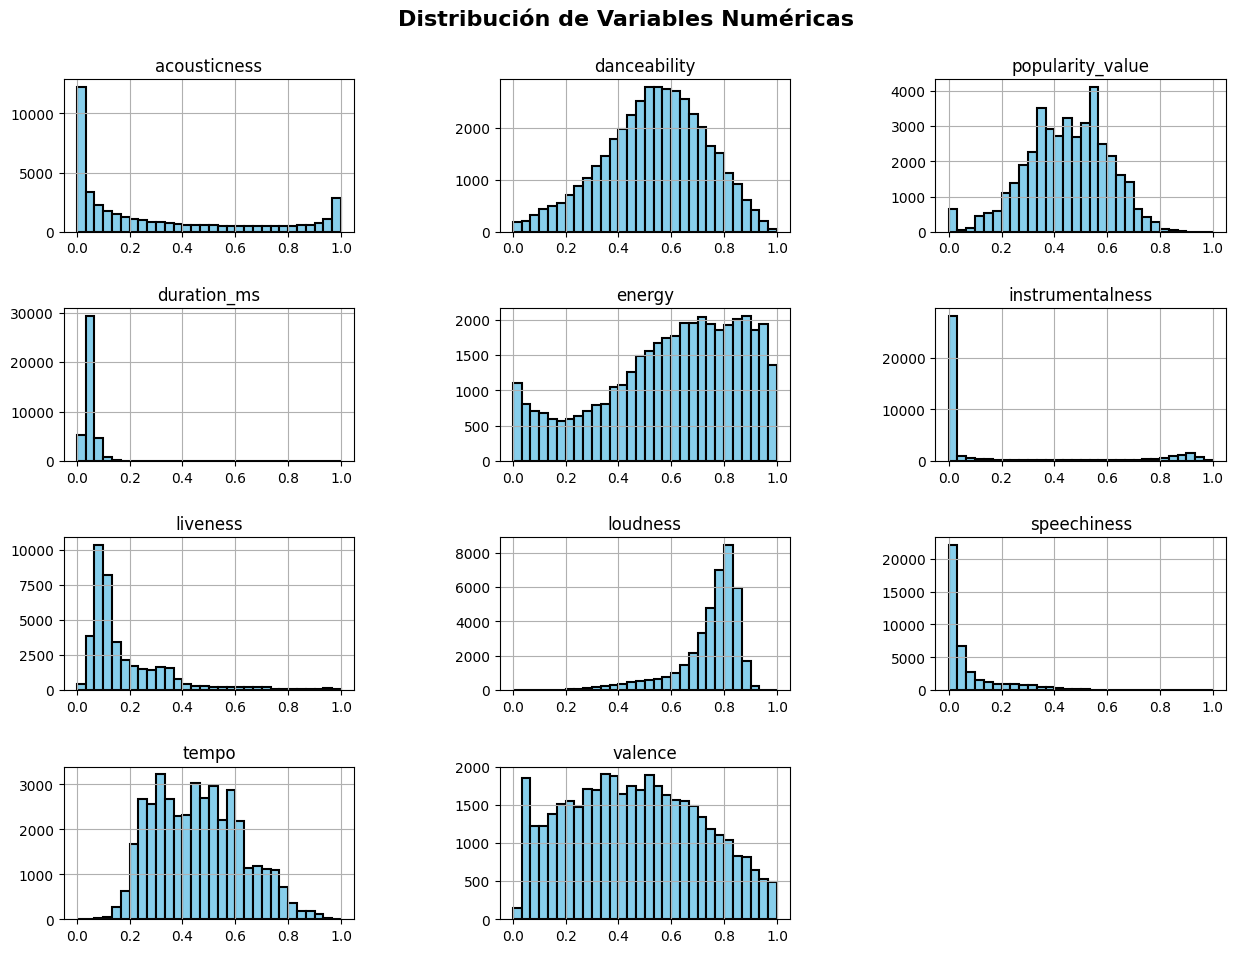

In [139]:
music_genre[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black', linewidth=1.5)
plt.suptitle('Distribución de Variables Numéricas', fontsize=16, y=1.02, weight='bold')
plt.subplots_adjust(top=0.95, hspace=0.5, wspace=0.5)
plt.show()

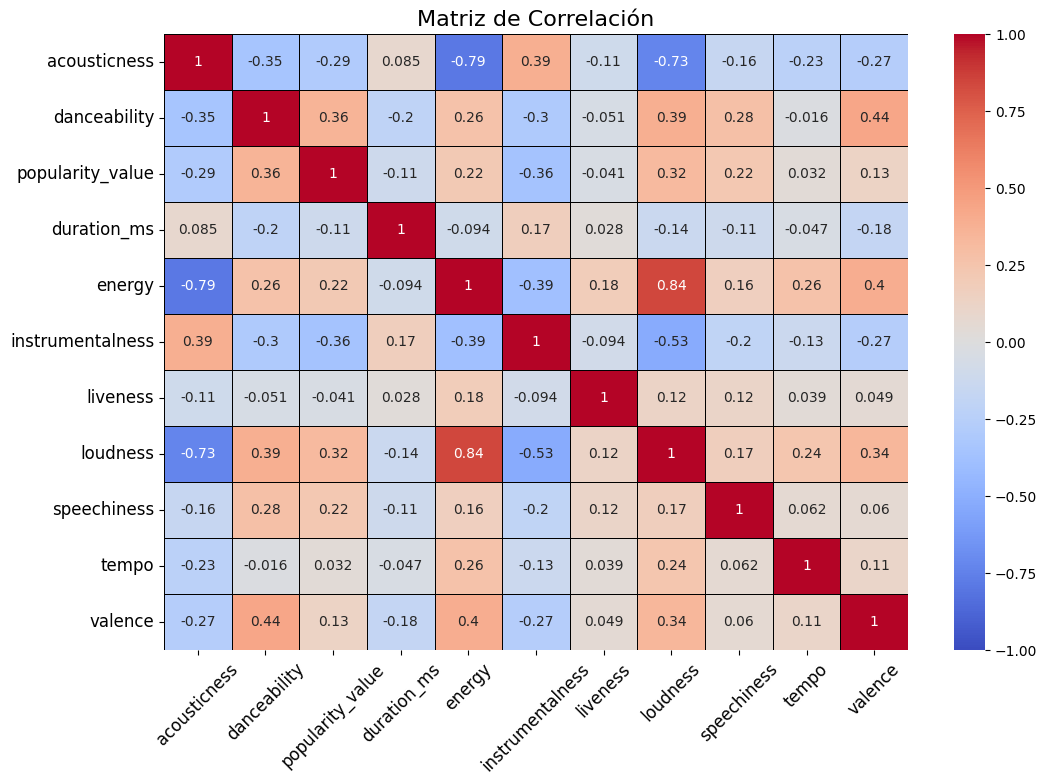

In [140]:
corr_matrix = music_genre[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Se realiza fischer score para ver el peso de las variables en la predicción de si es hit o no. 

               Specs         Score
7   instrumentalness  1.054773e+07
9           loudness  4.190387e+06
5        duration_ms  1.283546e+06
2         track_name  8.189656e+05
10       speechiness  6.201277e+05
4       danceability  1.947870e+05
3       acousticness  1.701244e+05
11             tempo  1.456173e+05
14  popularity_value  1.455682e+05
6             energy  1.296119e+05


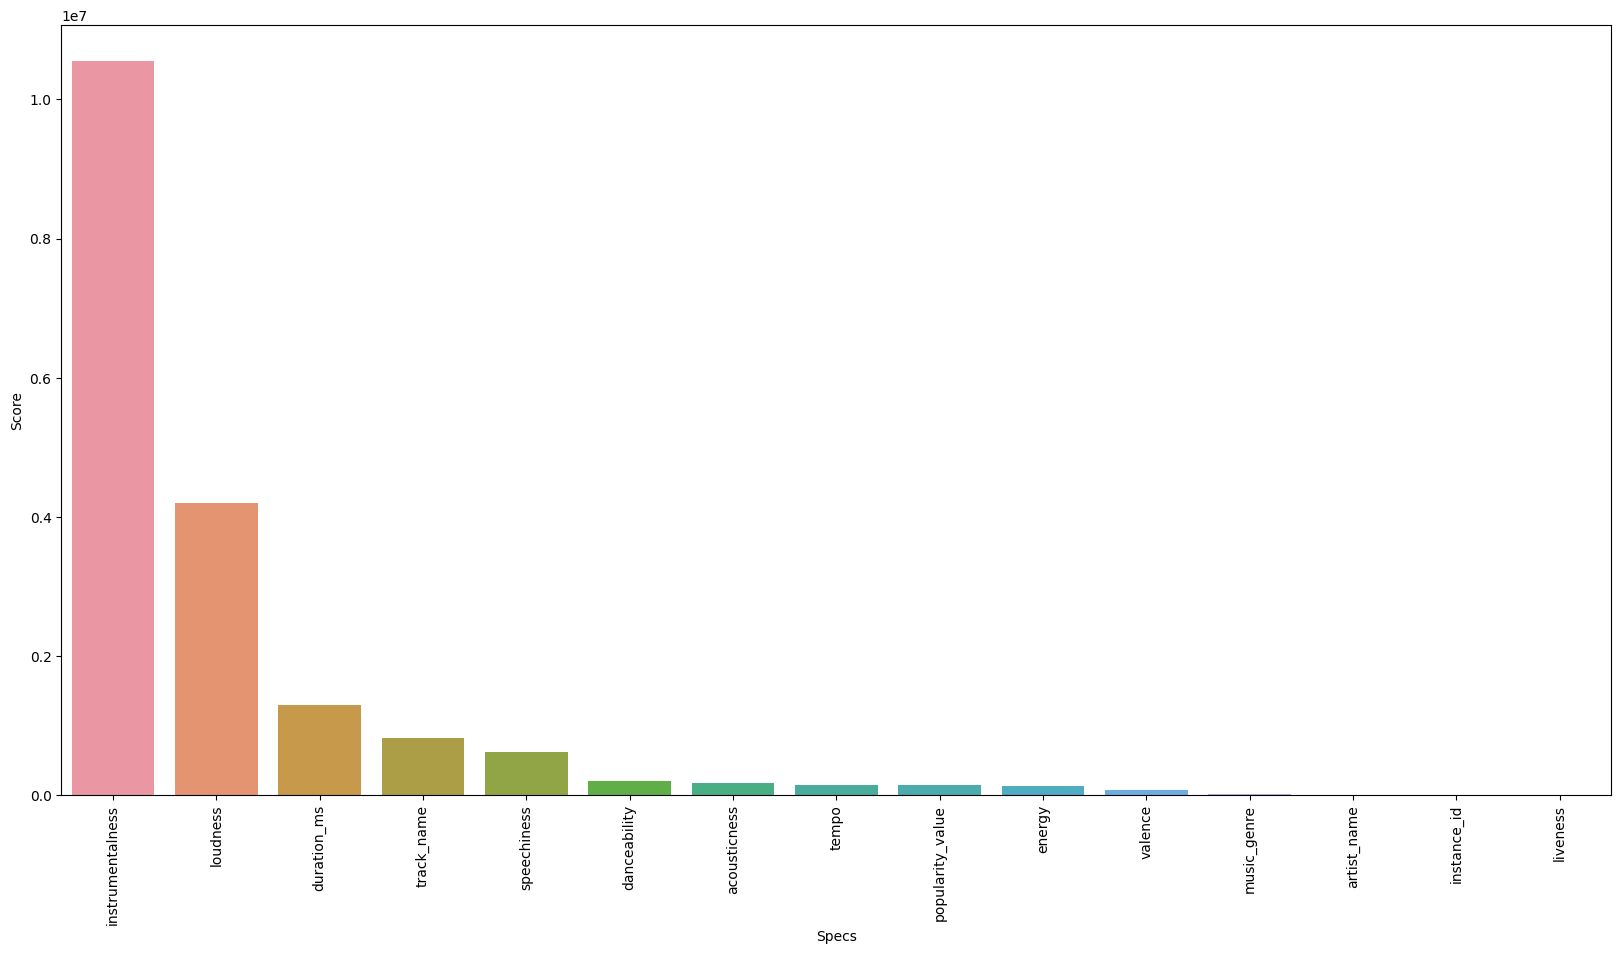

In [141]:
#realizar fischer score para ver que variables son mas importantes

#se implementa fischer score para ver la relevancia de las columnas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

X = music_genre.drop('hit', axis=1)
y = music_genre['hit']

#todas las variables ya son numericas
labelencoder = LabelEncoder()
for column in X.columns:
    X[column] = labelencoder.fit_transform(X[column])
    
#seleccion de las 10 mejores variables
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))
#ordenar de mejor a peor relevancia
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores = featureScores.reset_index(drop=True)
#se grafica la relevancia de las variables
plt.figure(figsize=(20, 10))
sns.barplot(x='Specs', y='Score', data=featureScores)
plt.xticks(rotation=90)  
plt.show()


In [145]:
df = music_genre.copy()

df['hit'] = df['hit'].astype(int)

drop_columns = ['track_name']

df.drop(drop_columns, axis=1, inplace=True)

df.head()







,instance_id,artist_name,hit,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre,popularity_value
1,46652.0,Thievery Corporation,0,0.012751,0.607081,0.045239,0.890804,0.953815,0.115446,0.787616,0.008372,0.433795,0.535282,5,0.313131
2,30097.0,Dillon Francis,0,0.003072,0.604922,0.044641,0.755562,0.011847,0.529450,0.835381,0.013265,0.503671,0.335685,5,0.282828
3,62177.0,Dubloadz,0,0.025502,0.771157,0.033768,0.700463,0.002540,0.148769,0.837724,0.235620,0.503778,0.272177,5,0.343434
4,24907.0,What So Not,0,0.004669,0.624352,0.046149,0.587260,0.912651,0.148769,0.802914,0.020659,0.595329,0.325605,5,0.323232
6,43760.0,Jordan Comolli,1,0.029016,0.553109,0.044372,0.803648,0.000008,0.097271,0.841741,0.357399,0.622001,0.231855,5,0.464646


Se puede concluir que hasta la columna energy es relevante para la predicción de si es un hit o no. Por lo que con la información anterior y el fischer score se puede colcuir que no es necesario incluir las columnas desde valence hacia la derecha. Si se es más especificos podríamos dejar desde instrumentalness hasta acousticness que alcanzan a ser percibidas en el gráfico.

In [146]:
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

tokenizer = RegexpTokenizer('[\'a-zA-Z]+')

lemmatizer = WordNetLemmatizer()

def tokenize(document):
    words = []
    for sentence in sent_tokenize(document):
        tokens = [lemmatizer.lemmatize(t.lower()) for t in tokenizer.tokenize(sentence) if t.lower() not in stop_words and len(t) > 2]
        words += tokens
    text = ' '.join(words)
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\itzae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itzae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [150]:
#vectorize columna artist_name
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
df['artist_name'] = df['artist_name'].apply(tokenize)


In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical


# Verificar las dimensiones iniciales de X e y
X = df.drop('hit', axis=1)
y = df['hit']
print(X.shape, y.shape)  # Asegúrate de que tengan las mismas dimensiones

# Paso 1: Divide el conjunto de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Paso 2: Divide el conjunto de entrenamiento en conjuntos de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42, stratify=y_train
)


# Verificar las dimensiones después de la vectorización
print(x_train_bow.shape, x_val_bow.shape, x_test_bow.shape)
print(y_train.shape, y_val.shape, y_test.shape)

# One-hot encode output data
y_train_bow = to_categorical(y_train)
y_val_bow = to_categorical(y_val)
y_test_bow = to_categorical(y_test)

# Verificar las nuevas dimensiones de los datos de salida
print(y_train_bow.shape, y_val_bow.shape, y_test_bow.shape)

# Definir el modelo MLP
num_classes = y_train_bow.shape[1]  # Asegúrate de obtener el número correcto de clases

inputs = Input(shape=(x_train_bow.shape[1],))
dense1 = Dense(512, activation="relu")(inputs)
dense2 = Dense(256, activation="relu")(dense1)
dense3 = Dense(num_classes, activation="sigmoid")(dense2)

model = Model(inputs=inputs, outputs=dense3)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Función para imprimir la precisión
def print_accuracy(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

# Entrenar el modelo
model.fit(x_train_bow, y_train_bow, validation_data=(x_val_bow, y_val_bow), epochs=20, batch_size=32, verbose=1)

# Hacer predicciones
y_pred = model.predict(x_test_bow)
y_pred = np.argmax(y_pred, axis=1)

# Evaluar y imprimir la precisión
print_accuracy(np.argmax(y_test_bow, axis=1), y_pred)

(40560, 14) (40560,)
(29304, 5000) (5172, 5000) (6084, 5000)
(29304,) (5172,) (6084,)
(29304, 2) (5172, 2) (6084, 2)


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,692,354 (10.27 MB)

 Trainable params: 2,692,354 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6904 - loss: 0.5558 - val_accuracy: 0.7740 - val_loss: 0.4504
Epoch 2/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8185 - loss: 0.3702 - val_accuracy: 0.7782 - val_loss: 0.4399
Epoch 3/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8306 - loss: 0.3376 - val_accuracy: 0.7817 - val_loss: 0.4461
Epoch 4/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8284 - loss: 0.3345 - val_accuracy: 0.7780 - val_loss: 0.4537
Epoch 5/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.8353 - loss: 0.3179 - val_accuracy: 0.7807 - val_loss: 0.4875
Epoch 6/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.8408 - loss: 0.3100 - val_accuracy: 0.7804 - val_loss: 0.4978
Epoch 7/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8367 - loss: 0.3118 - val_accuracy: 0.7807 - val_loss: 0.5230
Epoch 8/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8401 - loss: 0.3056 - 

Modelo MLP